In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Solar-Panel-Fault-Diagnosis/Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 825 files belonging to 6 classes.


In [ ]:
#Validation Image PreProcessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Solar-Panel-Fault-Diagnosis/Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 60 files belonging to 6 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[118.125    133.25     156.125   ]
   [118.25     132.375    155.75    ]
   [122.375    134.5      148.375   ]
   ...
   [ 43.375     54.625    107.      ]
   [ 45.625     58.25     101.5     ]
   [ 47.375     60.125    102.375   ]]

  [[ 49.375     64.375    128.375   ]
   [ 75.        93.625    150.125   ]
   [ 21.375     33.75      78.875   ]
   ...
   [ 32.25      49.       104.875   ]
   [ 31.        44.        86.      ]
   [ 37.125     47.        83.375   ]]

  [[ 82.75      98.75     158.625   ]
   [ 36.375     53.5      110.25    ]
   [ 66.75      77.875    122.25    ]
   ...
   [244.75     243.25     248.125   ]
   [227.5      230.875    237.25    ]
   [232.125    236.25     243.      ]]

  ...

  [[ 28.875     32.875     78.125   ]
   [ 36.75      41.75      97.625   ]
   [ 45.625     56.375    110.5     ]
   ...
   [108.375    112.25     116.      ]
   [ 44.75      48.75      59.875   ]
   [ 43.125     51.875     95.      ]]

  [[ 35.        39.        67.25  

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

Building Models

In [ ]:
model = Sequential()

In [ ]:
#Building Convolution Layer
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=6,activation="softmax"))

Compling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           9,006 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,794,730 (29.73 MB)

 Trainable params: 7,794,730 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.2432 - loss: 2.2375 - val_accuracy: 0.4333 - val_loss: 1.6764
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.3825 - loss: 1.5778 - val_accuracy: 0.3167 - val_loss: 1.6016
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.4023 - loss: 1.4682 - val_accuracy: 0.4333 - val_loss: 1.4707
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.4622 - loss: 1.3809 - val_accuracy: 0.3667 - val_loss: 1.5094
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.5120 - loss: 1.3184 - val_accuracy: 0.4500 - val_loss: 1.3251
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.5035 - loss: 1.2840 - val_accuracy: 0.4833 - val_loss: 1.3027
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.5965 - loss: 1.1311 - val_accuracy: 0.7000 - val_loss: 1.1625
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.6091 - loss: 1.1009 - val_accuracy: 0.5833 - v

In [ ]:
train_loss,train_acc = model.evaluate(training_set)

26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7555 - loss: 0.7029


In [ ]:
val_loss,val_acc = model.evaluate(validation_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 756ms/step - accuracy: 0.6625 - loss: 0.9725


In [ ]:
print(train_loss,train_acc)

0.7317671179771423 0.7503030300140381


In [ ]:
print(val_loss,val_acc)

0.9802604913711548 0.6499999761581421


Saving Model

In [ ]:
model.save("trained_model.h5")

In [ ]:
training_history.history

{'accuracy': [0.26181817054748535,
  0.3830302953720093,
  0.4375757575035095,
  0.4399999976158142,
  0.47515150904655457,
  0.513939380645752,
  0.5721212029457092,
  0.5915151238441467,
  0.6363636255264282,
  0.6727272868156433],
 'loss': [1.9118906259536743,
  1.5788604021072388,
  1.445785641670227,
  1.4269052743911743,
  1.3638503551483154,
  1.271505355834961,
  1.1765570640563965,
  1.1043524742126465,
  1.0101417303085327,
  0.9031188488006592],
 'val_accuracy': [0.4333333373069763,
  0.3166666626930237,
  0.4333333373069763,
  0.36666667461395264,
  0.44999998807907104,
  0.4833333194255829,
  0.699999988079071,
  0.5833333134651184,
  0.7333333492279053,
  0.6499999761581421],
 'val_loss': [1.6763774156570435,
  1.6015502214431763,
  1.4707096815109253,
  1.5094420909881592,
  1.3250916004180908,
  1.3026715517044067,
  1.1625105142593384,
  1.1449568271636963,
  1.0600802898406982,
  0.98026043176651]}

In [ ]:
import json
with open("training_history.json","w") as f:
  json.dump(training_history.history,f)

Accuracy Visualization

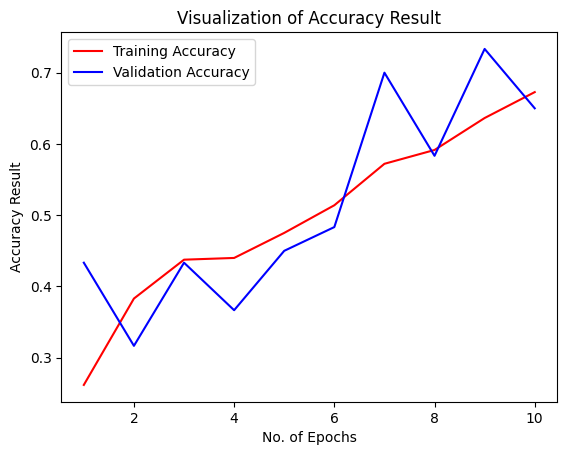

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.title("Visualization of Accuracy Result")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()

plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Bird-Drop',
 'Clean',
 'Dusty',
 'Electrical-Damage',
 'Physical-Damage',
 'Snow-Covered']

In [ ]:
test_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Solar-Panel-Fault-Diagnosis/Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 60 files belonging to 6 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 926ms/step


(array([[7.13636875e-01, 8.95191208e-02, 1.00268617e-01, 2.25314423e-02,
         5.87900691e-02, 1.52538409e-02],
        [7.80862033e-01, 5.77545092e-02, 4.03219536e-02, 4.18594964e-02,
         6.95855692e-02, 9.61652584e-03],
        [5.06254435e-01, 1.22910656e-01, 1.42089486e-01, 9.13699344e-02,
         9.10386220e-02, 4.63367961e-02],
        [1.64844111e-01, 2.23673061e-02, 7.14453936e-01, 2.62668096e-02,
         1.33917704e-02, 5.86760193e-02],
        [1.94783732e-01, 1.27222314e-01, 5.73543549e-01, 2.38855947e-02,
         2.46887356e-02, 5.58759607e-02],
        [7.80862033e-01, 5.77545092e-02, 4.03219536e-02, 4.18594964e-02,
         6.95855692e-02, 9.61652584e-03],
        [6.05339766e-01, 5.66362925e-02, 1.08690254e-01, 1.09908350e-01,
         1.04096144e-01, 1.53291998e-02],
        [1.64844111e-01, 2.23673061e-02, 7.14453936e-01, 2.62668096e-02,
         1.33917704e-02, 5.86760193e-02],
        [5.06254435e-01, 1.22910656e-01, 1.42089486e-01, 9.13699344e-02,
       

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 3, 4, 1, 1, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2, 5, 4, 3, 0, 4,
       3, 4, 0, 4, 0, 3, 2, 5, 5, 0, 5, 5, 5, 0, 5, 5])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(60, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.,

In [ ]:
# sample_image_path='/content/damage3.jpg'
# predicted_class= classify_image(sample_image_path)
# print("Predicted class:",predicted_class)

In [ ]:
Y_true= tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                   precision    recall  f1-score   support

        Bird-Drop       0.40      0.60      0.48        10
            Clean       0.86      0.60      0.71        10
            Dusty       0.64      0.90      0.75        10
Electrical-Damage       0.64      0.70      0.67        10
  Physical-Damage       0.80      0.40      0.53        10
     Snow-Covered       0.88      0.70      0.78        10

         accuracy                           0.65        60
        macro avg       0.70      0.65      0.65        60
     weighted avg       0.70      0.65      0.65        60



In [ ]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[6, 1, 3, 0, 0, 0],
       [2, 6, 0, 1, 1, 0],
       [1, 0, 9, 0, 0, 0],
       [1, 0, 1, 7, 0, 1],
       [3, 0, 0, 3, 4, 0],
       [2, 0, 1, 0, 0, 7]])

Confusion Matrix Visualization

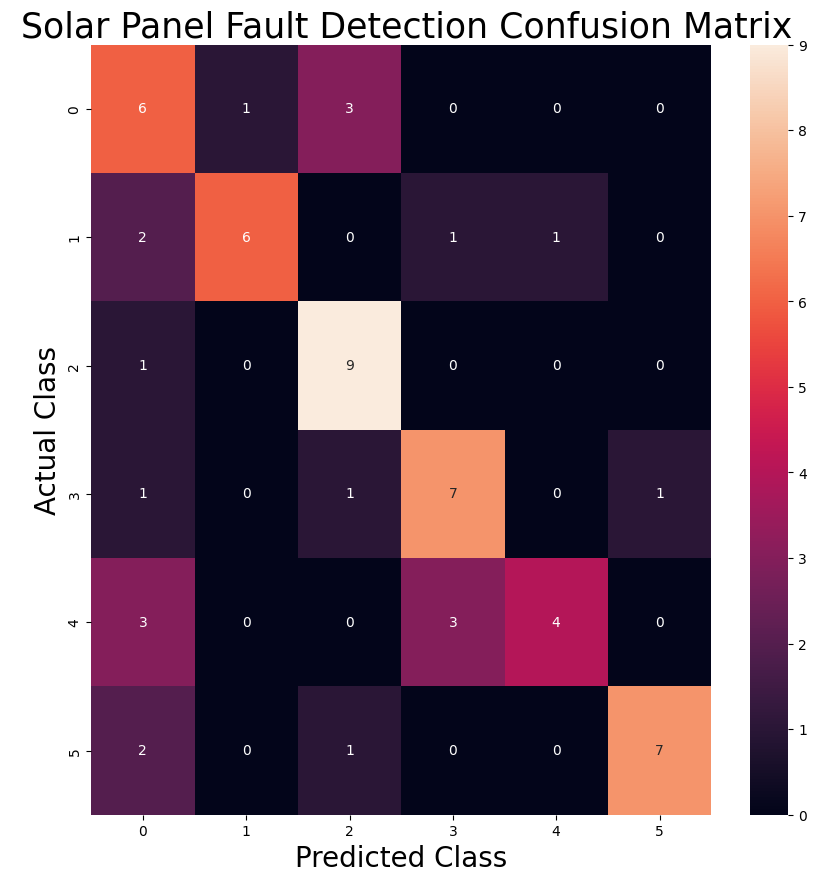

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title(" Solar Panel Fault Detection Confusion Matrix",fontsize=25)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!pip install opencv-python

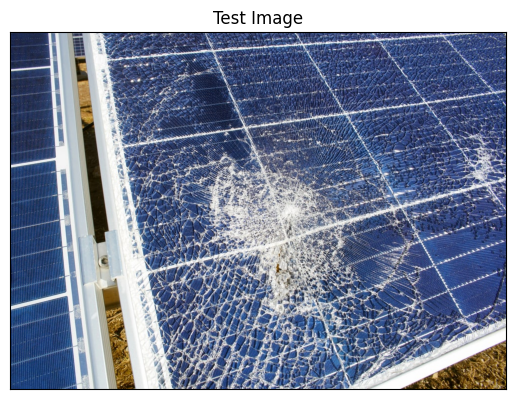

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/Solar-Panel-Fault-Diagnosis/Dataset/Physical-Damage/Physical (8).jpg"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [ ]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])#converting single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


(array([[0.11492215, 0.00490045, 0.00250583, 0.04649172, 0.8289708 ,
         0.00220902]], dtype=float32),
 (1, 6))

In [ ]:
result_index = np.argmax(prediction)
result_index

np.int64(4)

In [ ]:
class_name=['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

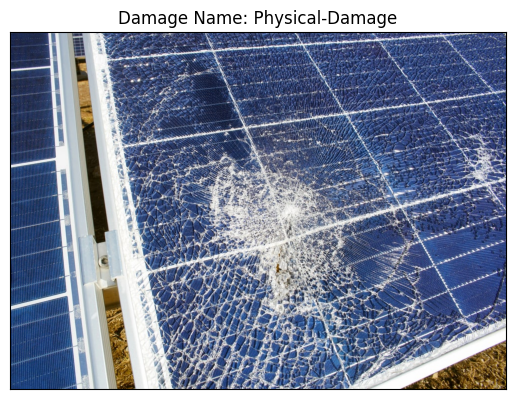

Predicted Class Name: Physical-Damage


In [ ]:
#Displaying Result of class name
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Damage Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

print("Predicted Class Name:",model_prediction)

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import Markdown, display
def to_markdown(text):
  text= text.replace("","")
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _:True))

In [ ]:
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(f"Model Name: {m.name}")

Model Name: models/gemini-1.0-pro-vision-latest
Model Name: models/gemini-pro-vision
Model Name: models/gemini-1.5-pro-latest
Model Name: models/gemini-1.5-pro-001
Model Name: models/gemini-1.5-pro-002
Model Name: models/gemini-1.5-pro
Model Name: models/gemini-1.5-flash-latest
Model Name: models/gemini-1.5-flash-001
Model Name: models/gemini-1.5-flash-001-tuning
Model Name: models/gemini-1.5-flash
Model Name: models/gemini-1.5-flash-002
Model Name: models/gemini-1.5-flash-8b
Model Name: models/gemini-1.5-flash-8b-001
Model Name: models/gemini-1.5-flash-8b-latest
Model Name: models/gemini-1.5-flash-8b-exp-0827
Model Name: models/gemini-1.5-flash-8b-exp-0924
Model Name: models/gemini-2.5-pro-exp-03-25
Model Name: models/gemini-2.5-pro-preview-03-25
Model Name: models/gemini-2.0-flash-exp
Model Name: models/gemini-2.0-flash
Model Name: models/gemini-2.0-flash-001
Model Name: models/gemini-2.0-flash-exp-image-generation
Model Name: models/gemini-2.0-flash-lite-001
Model Name: models/gemin

In [ ]:
model2= genai.GenerativeModel('gemini-2.0-flash')

In [ ]:
import google.generativeai as genai

model_info = genai.get_model("models/gemini-2.0-flash")

# Returns the "context window" for the model,
# which is the combined input and output token limits.
print(f"{model_info.input_token_limit=}")
print(f"{model_info.output_token_limit=}")
# ( input_token_limit=30720, output_token_limit=2048 )

model_info.input_token_limit=1048576
model_info.output_token_limit=8192


In [ ]:
response= model2.generate_content("tell about tesla?")

In [ ]:
to_markdown(response.text)

> Alright, let's dive into the world of Tesla! Here's a comprehensive overview of the company:
> 
> **What is Tesla?**
> 
> Tesla, Inc. is an American multinational corporation based in Austin, Texas, that designs, develops, manufactures, leases, and sells electric vehicles (EVs), battery energy storage systems, and solar products. It's also involved in related services.  Tesla is arguably the most prominent and influential company in the electric vehicle industry, driving innovation and pushing the boundaries of what's possible in sustainable transportation and energy.
> 
> **Key Aspects of Tesla:**
> 
> *   **Electric Vehicles (EVs):**
>     *   This is Tesla's most well-known product line.  They offer a range of EVs, including:
>         *   **Model S:** A high-performance sedan, known for its speed, range, and technology.
>         *   **Model 3:** A more affordable mass-market sedan, and Tesla's best-selling vehicle.
>         *   **Model X:** An SUV with distinctive "falcon wing" doors.
>         *   **Model Y:** A compact SUV, based on the Model 3 platform, offering more practicality.
>         *   **Cybertruck:** A futuristic and polarizing pickup truck (currently in limited production).
>         *   **Semi:** An all-electric semi-truck (in limited production).
>         *   **Roadster (2nd Generation):**  A high-performance sports car (currently in development).
>     *   Tesla vehicles are known for their:
>         *   **Long Range:**  Tesla consistently pushes the boundaries of EV range, offering vehicles with ranges exceeding 300+ miles on a single charge.
>         *   **Performance:**  Many Tesla models offer incredible acceleration and handling.
>         *   **Technology:**  Advanced driver-assistance systems (Autopilot and Full Self-Driving), over-the-air software updates, and large touchscreen interfaces are hallmarks of Tesla vehicles.
>         *   **Supercharger Network:**  Tesla has built a vast network of Supercharger stations around the world, making long-distance EV travel more convenient.
> 
> *   **Energy Storage Systems:**
>     *   Tesla produces battery storage systems for homes, businesses, and utilities.
>         *   **Powerwall:** A home battery system that stores solar energy or grid power, providing backup power during outages and reducing energy costs.
>         *   **Powerpack:** A larger-scale battery system for businesses and utilities, used for peak shaving, grid stabilization, and backup power.
>         *   **Megapack:** A utility-scale battery system for large-scale energy storage projects.
>     *   These systems are essential for:
>         *   **Integrating renewable energy:**  Storing solar and wind energy to make it available when needed.
>         *   **Improving grid reliability:**  Providing backup power and stabilizing the grid.
>         *   **Reducing energy costs:**  Shifting energy consumption to off-peak hours.
> 
> *   **Solar Products:**
>     *   Tesla offers solar panels and solar roof tiles for residential and commercial customers.
>         *   **Solar Panels:**  High-efficiency solar panels that can be installed on rooftops.
>         *   **Solar Roof:**  An integrated solar roof system that replaces traditional roofing materials with aesthetically pleasing solar tiles.
>     *   Tesla aims to make solar energy more accessible and affordable, helping homeowners and businesses generate their own clean electricity.
> 
> *   **Software and Autonomy:**
>     *   Tesla is heavily invested in software development, particularly in the areas of:
>         *   **Autopilot:**  An advanced driver-assistance system that provides features such as adaptive cruise control, lane keeping assist, and automatic lane changes.
>         *   **Full Self-Driving (FSD):**  A more advanced suite of features that aims to enable full autonomous driving capabilities (still under development and requiring driver supervision).
>         *   **Over-the-Air Updates:**  Tesla vehicles receive regular software updates that add new features, improve performance, and fix bugs.
>     *   Tesla's approach to autonomy relies heavily on computer vision and neural networks.
> 
> **History:**
> 
> *   **Founded in 2003:**  Originally named Tesla Motors, it was founded by Martin Eberhard and Marc Tarpenning. Elon Musk joined soon after and played a significant role in the company's development. He is now the CEO.
> *   **Roadster (2008):**  Tesla's first vehicle, a high-performance electric sports car that demonstrated the potential of EV technology.
> *   **Model S (2012):**  A groundbreaking electric sedan that established Tesla as a serious competitor in the automotive industry.
> *   **Model X (2015):**  An electric SUV with distinctive "falcon wing" doors.
> *   **Model 3 (2017):**  A more affordable mass-market sedan that significantly increased Tesla's production volume.
> *   **Model Y (2020):** A compact SUV that further expanded Tesla's market reach.
> 
> **Elon Musk's Role:**
> 
> *   Elon Musk is the CEO of Tesla and has been instrumental in shaping the company's vision and direction.
> *   He is known for his ambitious goals, his hands-on approach, and his sometimes controversial statements.
> *   Musk is also the CEO of SpaceX, Neuralink, and The Boring Company.
> 
> **Key Controversies and Challenges:**
> 
> *   **Production Issues:**  Tesla has faced challenges in scaling up production to meet demand, leading to delays and quality control issues.
> *   **Autopilot and FSD Safety:**  The safety of Tesla's Autopilot and Full Self-Driving systems has been a subject of ongoing debate and regulatory scrutiny.  There have been accidents involving these systems, raising concerns about their reliability.
> *   **Elon Musk's Behavior:**  Musk's social media activity and public statements have sometimes drawn criticism and legal challenges.
> *   **Valuation:**  Tesla's stock price has been highly volatile, and some analysts believe that the company's valuation is overinflated.
> *   **Competition:**  Traditional automakers and new EV startups are increasingly entering the electric vehicle market, increasing competition for Tesla.
> *   **Working conditions:** Concerns have been raised regarding worker safety and conditions at some Tesla factories.
> 
> **Impact and Influence:**
> 
> *   **Accelerated EV Adoption:** Tesla has played a major role in driving the adoption of electric vehicles worldwide.
> *   **Technological Innovation:**  Tesla has pushed the boundaries of EV technology, particularly in battery technology, motor design, and software.
> *   **Energy Storage Solutions:** Tesla's energy storage systems are helping to integrate renewable energy and improve grid reliability.
> *   **Inspired Other Companies:**  Tesla's success has inspired other automakers and technology companies to invest in electric vehicles and sustainable energy.
> 
> **In summary, Tesla is a pioneering company that is revolutionizing the automotive and energy industries. While facing challenges and controversies, it remains a dominant force in the electric vehicle market and a key player in the transition to a sustainable energy future.**


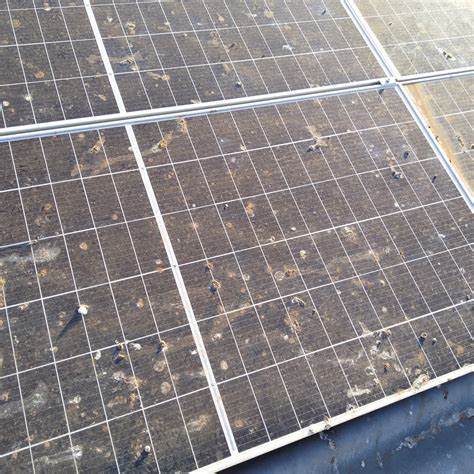

In [ ]:
import PIL.Image
img=PIL.Image.open("/content/drive/MyDrive/Solar-Panel-Fault-Diagnosis/Dataset/Bird-drop/Bird (10).jpg")
img

In [ ]:
model2= genai.GenerativeModel('gemini-2.0-flash')
response= model2.generate_content(["describe it?",img],stream=True)
response.resolve()
to_markdown(response.text)

> The image shows an array of solar panels that appear to be quite dirty. The panels are covered with what seems to be bird droppings and other debris. The grid pattern of the solar cells is visible beneath the grime, and the metal frames around the panels are also noticeably soiled. The panels are likely not operating at their optimal efficiency due to this layer of dirt.

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from PIL import Image as PILImage
import numpy as np
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
from IPython.display import display
def to_markdown(text):
     text= text.replace("*"," ")
     rox=textwrap.indent(text,'', predicate=lambda _:True)
     return rox


def predict_image(img):
  img = img.convert("RGB")  # Ensure the image is in RGB format
  img = img.resize((128, 128)) # Resize using img_height and img_width
  img_array = np.array(img)  # Convert PIL Image to NumPy array
  img_array = img_array.reshape(1, 128, 128, 3)  # Reshape for model input
  prediction = model.predict(img_array)[0]
  model2= genai.GenerativeModel('gemini-2.0-flash')
  response= model2.generate_content(["suggestions to clear the damages of the panels?",img],stream=True)
  response.resolve()



  text1=to_markdown(response.text)



  return {class_name[i]: float(prediction[i]) for i in range(len(class_name))},text1

In [ ]:
image= gr.Image(type="pil")
label= gr.Label(num_top_classes=6)
textbox = gr.Textbox(label="Suggestion box", lines=10)
gr.Interface(title='Solar Panel Fault Detection Project',description='Upload Your Solar Panel Images to Check Damage Percentages and Get Solutions for Repair.',fn=predict_image, inputs=image, outputs=[label, textbox]).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://78a020c3a7faac546c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
